# HUHU@IberLEF2023

## Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import numpy as np
from math import sqrt

## Environment

In [2]:
PATH = os.getcwd() + "\\data\\"

In [3]:
test_gold = pd.read_csv(PATH + "test_gold.csv")

test_gold_bin = test_gold["humor"]
test_gold_multi = test_gold[["prejudice_woman", "prejudice_lgbtiq", "prejudice_inmigrant_race", "gordofobia"]]
test_gold_reg = test_gold["mean_prejudice"]

In [4]:
bin1_class = pd.read_csv(PATH + "bin-1-class.csv").drop("tweet_id", axis = 1)
bin1_weight = pd.read_csv(PATH + "bin-1-weight.csv").drop("tweet_id", axis = 1)

bin2_class = pd.read_csv(PATH + "bin-2-class.csv").drop("tweet_id", axis = 1)
bin2_weight = pd.read_csv(PATH + "bin-2-weight.csv").drop("tweet_id", axis = 1)


multi1_class = pd.read_csv(PATH + "multi-1-class.csv").drop("tweet_id", axis = 1)
multi1_weight = pd.read_csv(PATH + "multi-1-weight.csv").drop("tweet_id", axis = 1)

multi2_class = pd.read_csv(PATH + "multi-2-class.csv").drop("tweet_id", axis = 1)
multi2_weight = pd.read_csv(PATH + "multi-2-weight.csv").drop("tweet_id", axis = 1)


reg1_class = pd.read_csv(PATH + "reg-1-class.csv").drop("tweet_id", axis = 1)
reg1_weight = pd.read_csv(PATH + "reg-1-weight.csv").drop("tweet_id", axis = 1)

reg2_class = pd.read_csv(PATH + "reg-2-class.csv").drop("tweet_id", axis = 1)
reg2_weight = pd.read_csv(PATH + "reg-2-weight.csv").drop("tweet_id", axis = 1)

## Graphs

In [5]:
LABELS_BIN = ["humor", "no-humor"]

In [6]:
LABELS_MULTI = ["W", "L", "I", "G"]

### Classification Report (BINARY & MULTICLASS)

In [7]:
def classification_report_all(true, predicted, labels):

    cr = classification_report(y_true = true, y_pred = predicted, target_names = labels, output_dict = True, zero_division = 0)
    plt.figure(figsize = (10, 10))

    sb.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot = True, fmt = ".3f", cbar_kws = {"shrink": 0.5}, annot_kws = {"size": 25}, linecolor = "black", linewidth = 0.1)
    plt.xlabel("Evaluated Metrics", fontsize = 10, labelpad = 10)
    plt.ylabel("Classes & Metrics", fontsize = 10, labelpad = 10)

    plt.show()

### Confusion Matrix Binary

In [8]:
def confusion_matrix_binary(predicted, name):

    fig_cm = plt.figure(figsize = (10, 10))
    cm = confusion_matrix(test_gold_bin, predicted, normalize = "true")

    sb.heatmap(cm, vmin = 0, vmax = 1, square = True, annot = True, fmt = ".3f", cbar_kws = {"shrink" : 0.5}, xticklabels = LABELS_BIN, yticklabels = LABELS_BIN, annot_kws = {"size": 25}, linecolor = "black", linewidth = 0.1)
    plt.xlabel("Predicted Values", fontsize = 10, labelpad = 10)
    plt.ylabel("True Values", fontsize = 10, labelpad = 10)

    fig_cm.savefig(name + ".pdf")
    plt.show()

### Confusion Matrix Multiclass

In [9]:
def confusion_matrix_multiclass(predicted, name):

    fig_cm, axes_cm = plt.subplots(2, 2, figsize = (10, 10))
    axes_cm_ravel = axes_cm.ravel()

    array_labels = []
    for i in test_gold_multi.values:
        arr = np.array(i)
        array_labels.append(arr)

    array_predicted_labels = []
    for i in predicted.values:
        arr = np.array(i)
        array_predicted_labels.append(arr)

    for i in range(len(LABELS_MULTI)):
        y_true = [label[i] for label in array_labels]
        y_pred = [label[i] for label in array_predicted_labels]
        disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred, normalize = "true"), display_labels = [f"not-class", f"yes-class"])
        disp.plot(ax = axes_cm_ravel[i], cmap = "rocket")
        disp.ax_.set_title("Class - {}".format(LABELS_MULTI[i]), fontsize = 15, pad = 10)
        if i<2:
            disp.ax_.set_xlabel("")
        else:
            disp.ax_.set_xlabel("Predicted Values", fontsize = 15, labelpad = 20)
        if i%2!=0:
            disp.ax_.set_ylabel("")
        else:
            disp.ax_.set_ylabel("True Values", fontsize = 15, labelpad = 20)
        disp.im_.colorbar.remove()
        disp.ax_.grid(False)

    plt.subplots_adjust(wspace = 0.5, hspace = 0.1)
    fig_cm.colorbar(disp.im_, ax = axes_cm_ravel, fraction = 0.025, pad = 0.05)

    fig_cm.savefig(name + ".pdf")
    plt.show()

### Regression

In [10]:
def regression(predicted, name, mode):

    test_predictions = pd.concat([pd.DataFrame(test_gold_reg), predicted], axis = 1, join = "inner")

    if mode :
        fig_reg, ax = plt.subplots(figsize = (10, 10))
        min_score = min(min(test_predictions["mean_prejudice"]), min(test_predictions["prejudice_degree"]))
        max_score = max(max(test_predictions["mean_prejudice"]), max(test_predictions["prejudice_degree"]))

        sb.scatterplot(data = test_predictions, x = "mean_prejudice", y = "prejudice_degree", color = "orange", ax = ax)
        ax.plot([min_score, max_score], [min_score, max_score], "k--")
        ax.set_xlabel("", labelpad = 0)
        ax.set_ylabel("", labelpad = 0)

        fig_reg.text(0.5, 0.05, "True score", ha = "center", fontsize = 10)
        fig_reg.text(0.075, 0.5, "Predicted score", va = "center", rotation="vertical", fontsize = 10)

        fig_reg.savefig(name + ".pdf")
        plt.show()

    else:
        print("RMSE:", str(sqrt(mean_squared_error(test_predictions["mean_prejudice"], test_predictions["prejudice_degree"]))))

## OBJETIVE 1- CLASSICAL VOTING

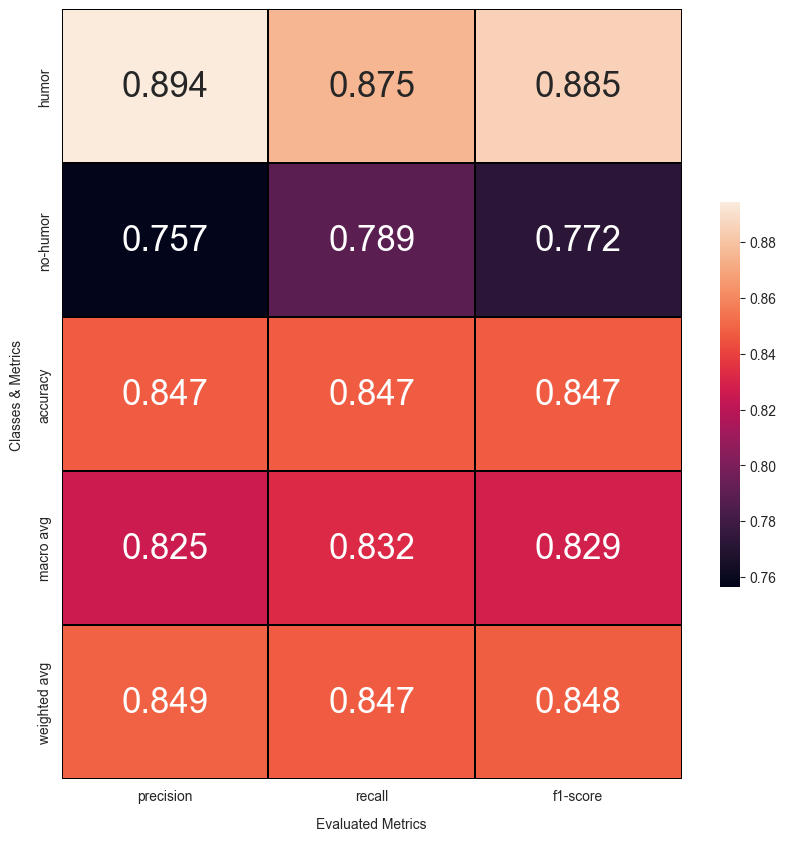

In [11]:
classification_report_all(test_gold_bin, bin1_class, LABELS_BIN)

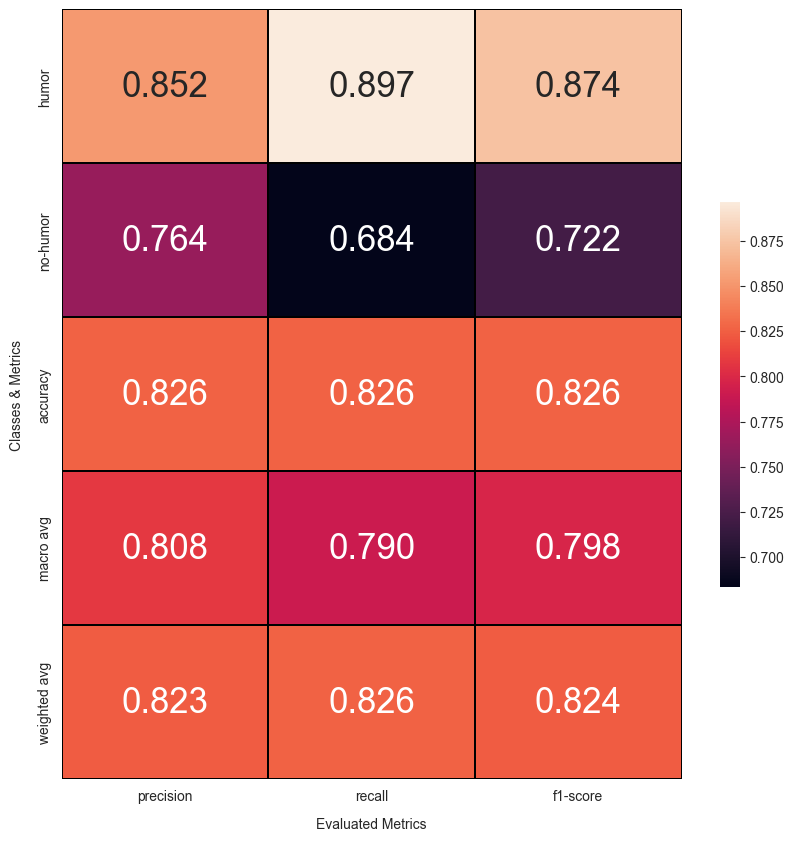

In [12]:
classification_report_all(test_gold_bin, bin2_class, LABELS_BIN)

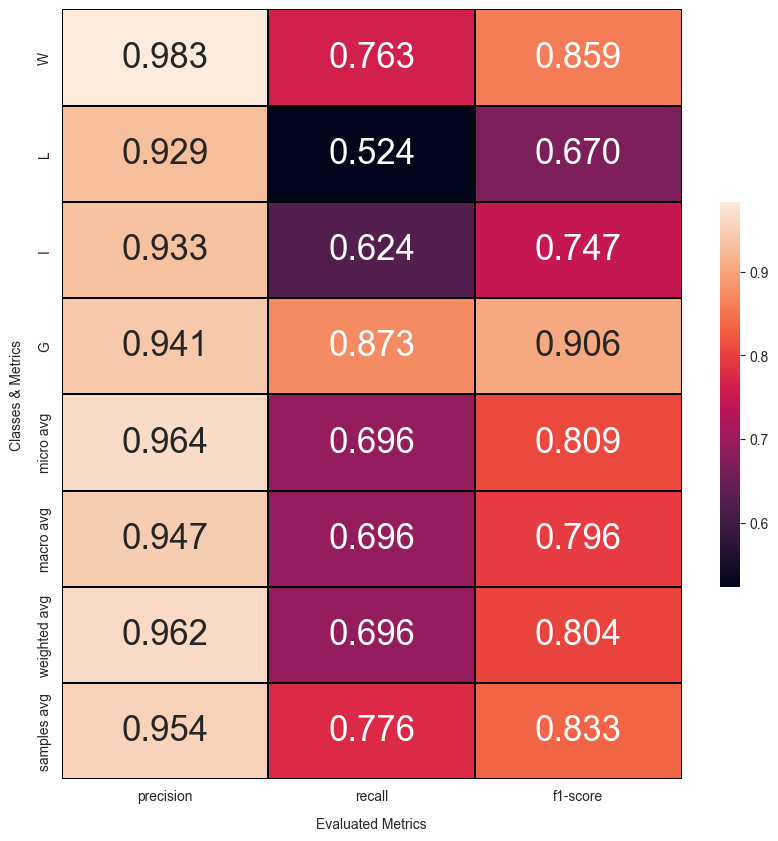

In [13]:
classification_report_all(test_gold_multi, multi1_class, LABELS_MULTI)

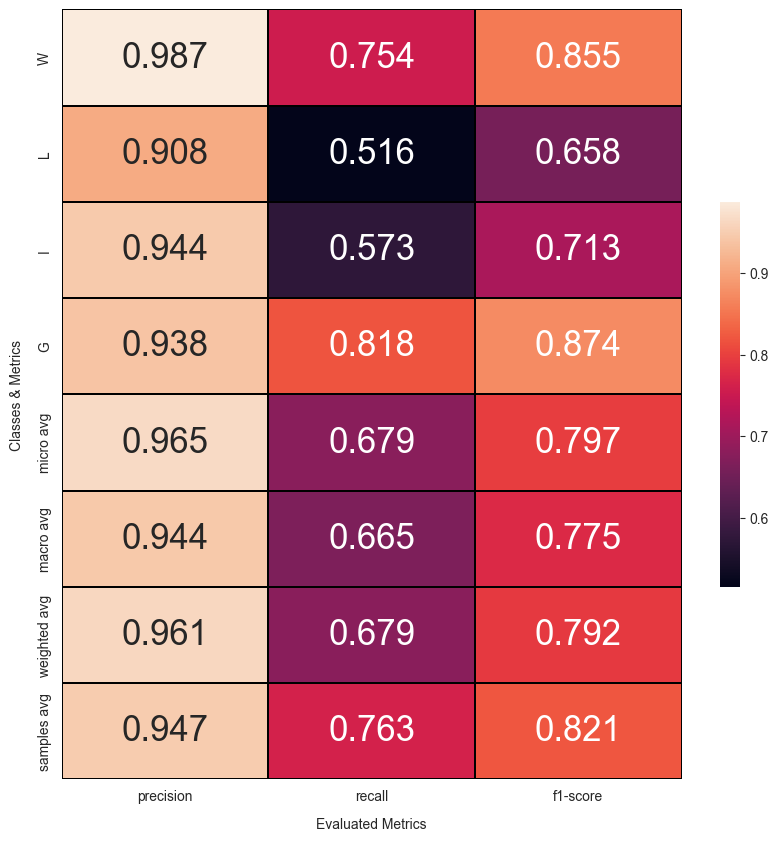

In [14]:
classification_report_all(test_gold_multi, multi2_class, LABELS_MULTI)

In [15]:
regression(reg1_class, "", False)

RMSE: 0.933873079343262


In [16]:
regression(reg2_class, "", False)

RMSE: 0.9381498879395269


## OBJETIVE 2 - GRAPHS

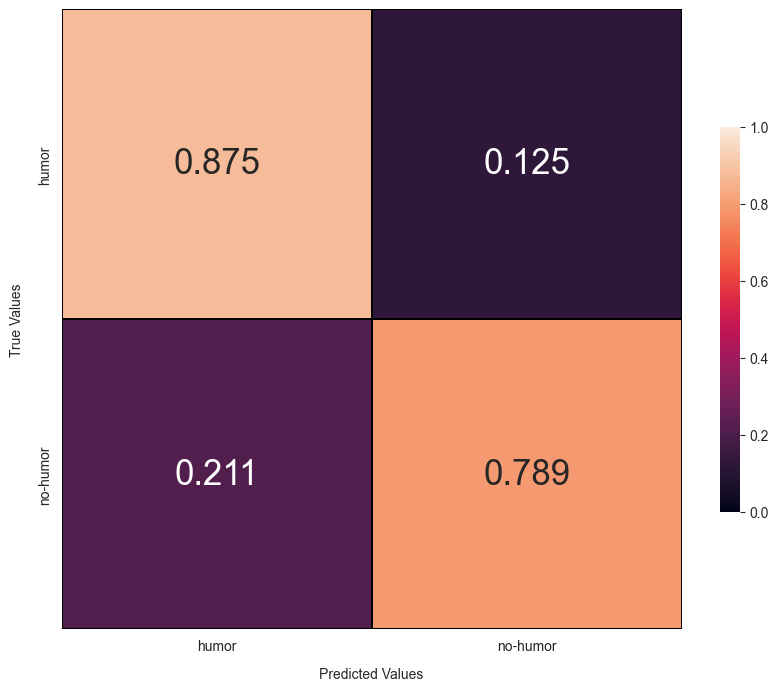

In [17]:
confusion_matrix_binary(bin1_weight, "BIN1")

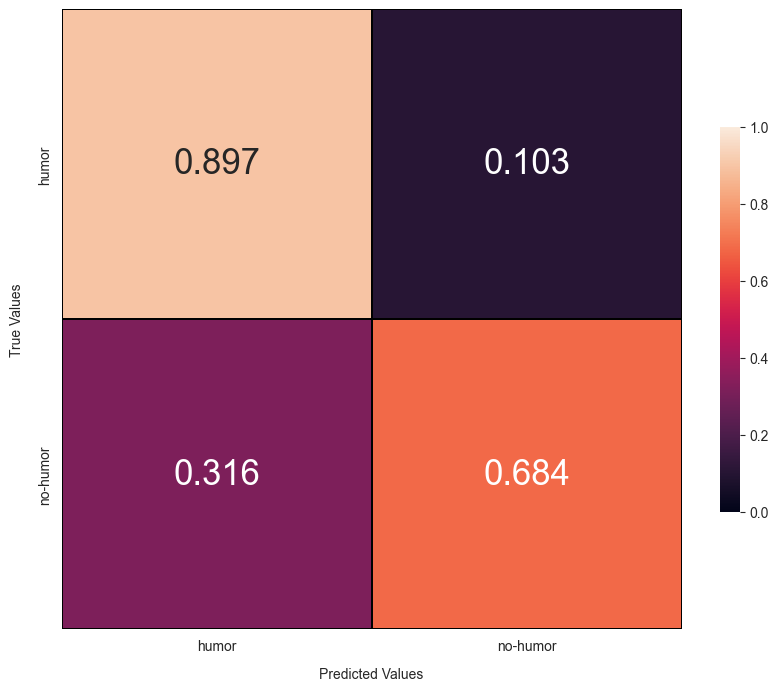

In [18]:
confusion_matrix_binary(bin2_weight, "BIN2")

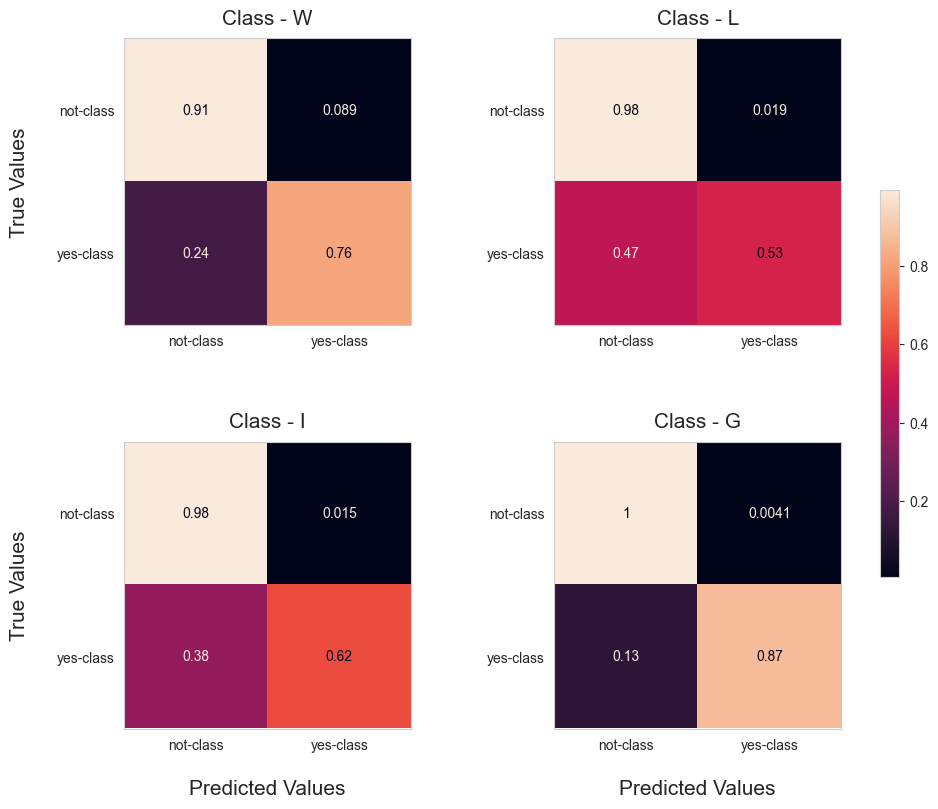

In [19]:
confusion_matrix_multiclass(multi1_weight, "MULTI1")

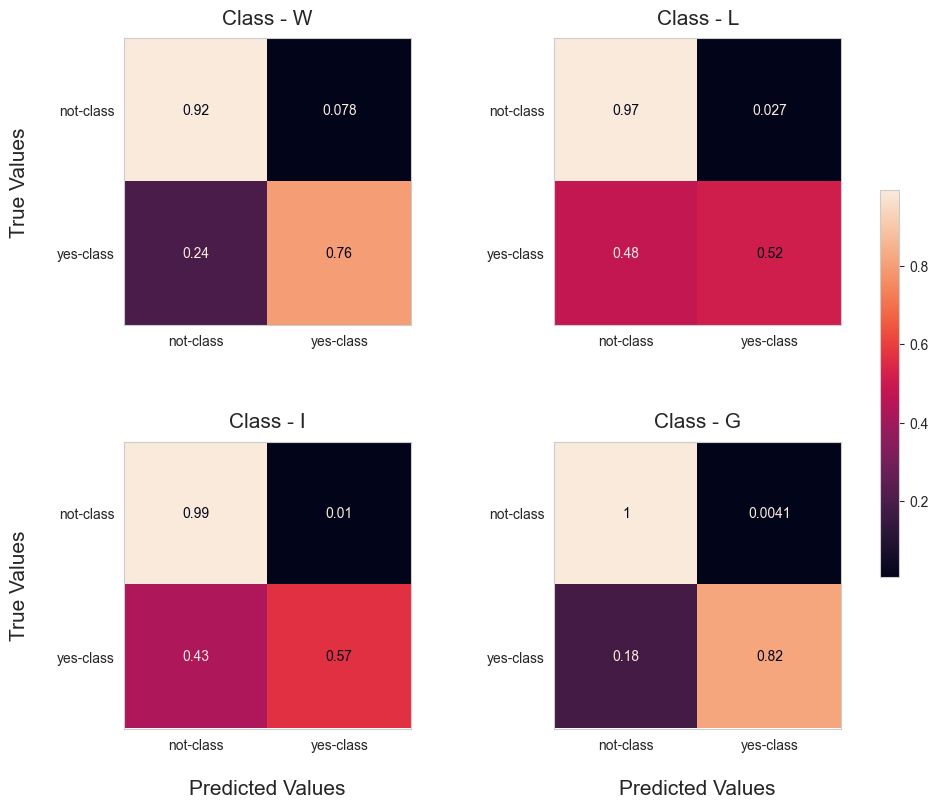

In [20]:
confusion_matrix_multiclass(multi2_weight, "MULTI2")

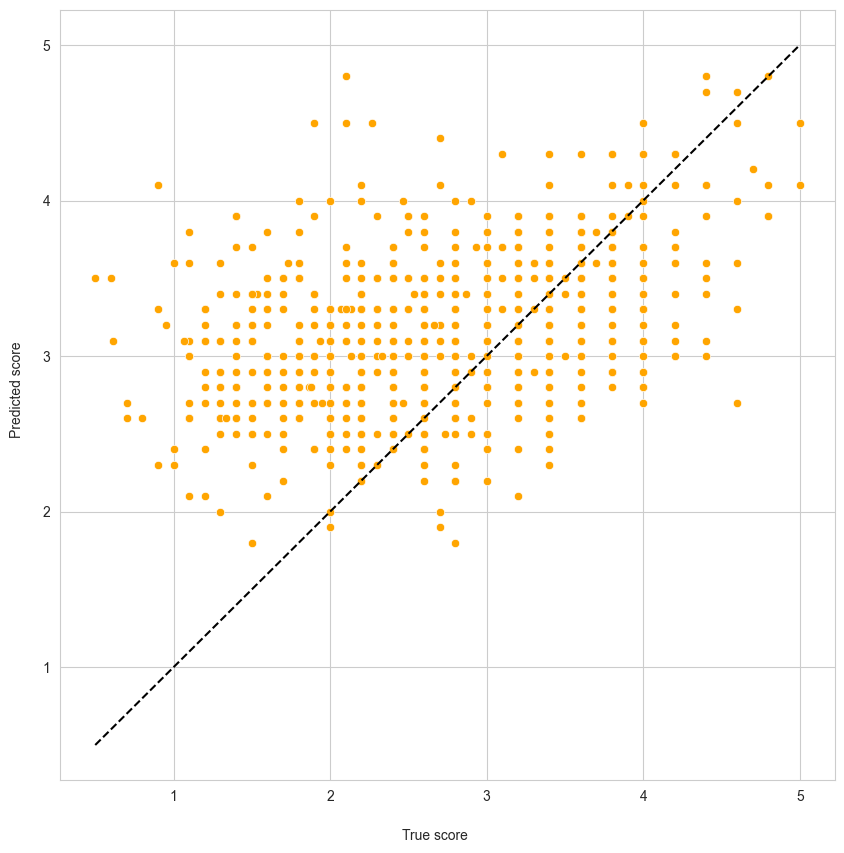

In [21]:
regression(reg1_weight, "REG1", True)

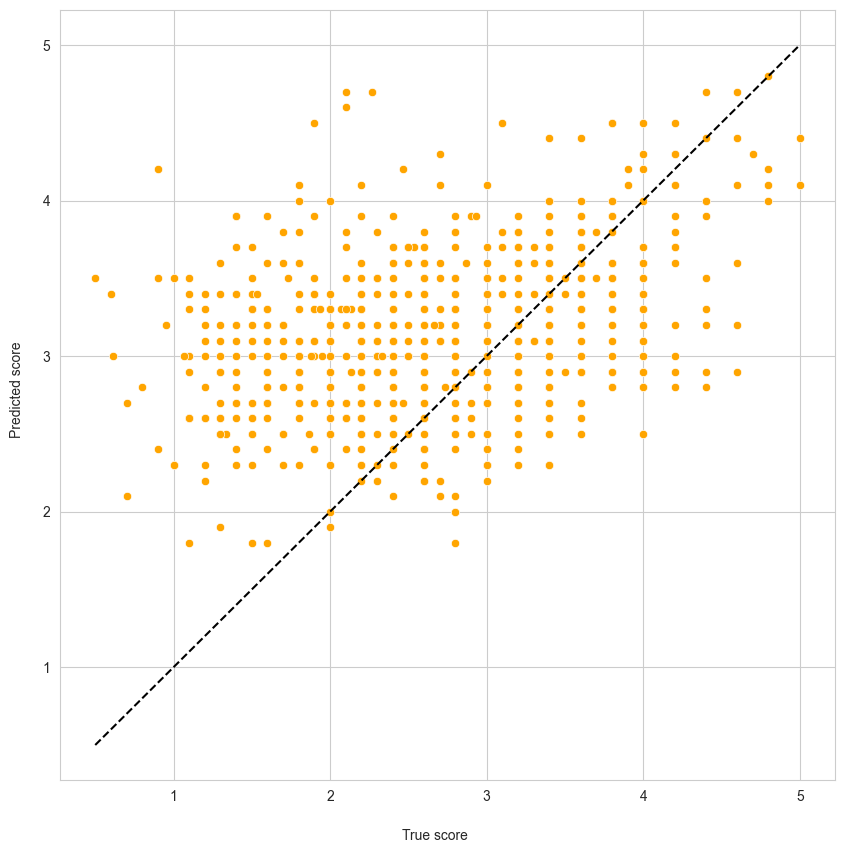

In [22]:
regression(reg2_weight, "REG2", True)